# This code is for additional reference

Labels without using sklearn(K-means): [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
Centroids (K-means) without using sklearn: [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]]
Labels (Agglomerative): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


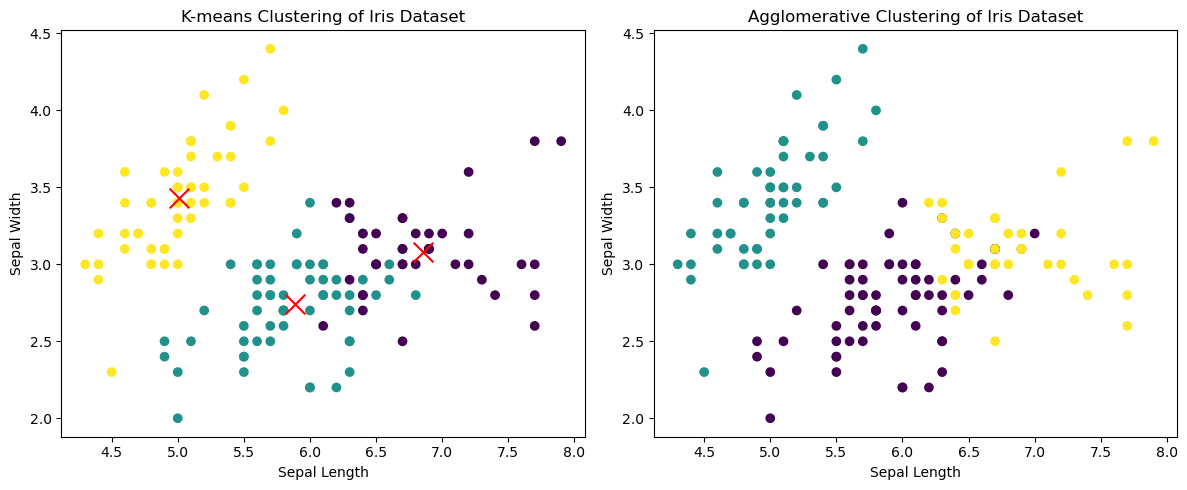

C:\Users\Ramachandra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Scikit-learn K-means Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Scikit-learn K-means Centroids: [[5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]]


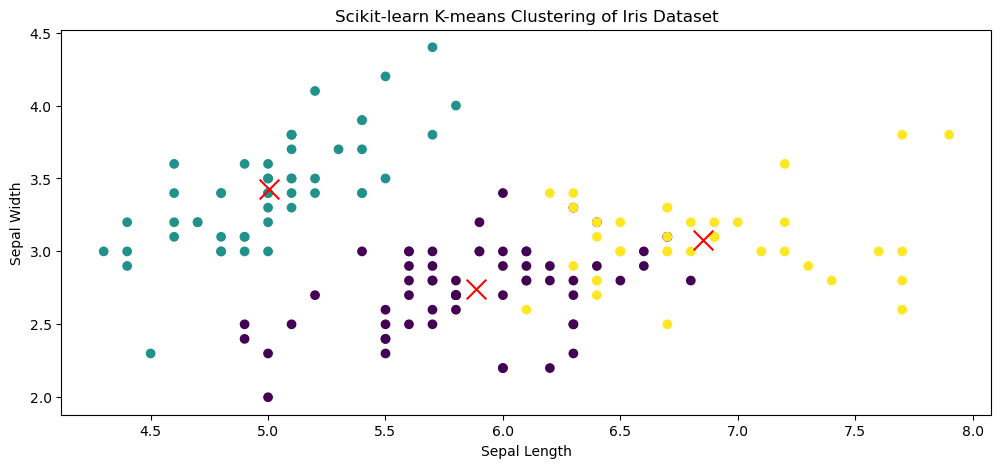

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def kmeans(X, K, max_iters=100):
    centroids = X[:K]

    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        expanded_x = X[:, np.newaxis]
        euc_dist = np.linalg.norm(expanded_x - centroids, axis=2)
        labels = np.argmin(euc_dist, axis=1)

        # Update the centroids based on the assigned point
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])

        # If the centroids did not change, stop iterating
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# Load the Iris dataset
X = load_iris().data
K = 3
labels, centroids = kmeans(X, K)
print("Labels without using sklearn(K-means):", labels)
print("Centroids (K-means) without using sklearn:", centroids)

# Apply hierarchical clustering using Agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=3)
labels_agg = agglomerative.fit_predict(X)
print("Labels (Agglomerative):", labels_agg)

# Plotting K-means results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering of Iris Dataset')

# Plotting Agglomerative clustering results
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_agg)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Agglomerative Clustering of Iris Dataset')

plt.tight_layout()
plt.show()

# K Means using SK Learn 
from sklearn.cluster import KMeans

K = 3
kmeans = KMeans(n_clusters=K, random_state=0)
labels_sklearn = kmeans.fit_predict(X)
centroids_sklearn = kmeans.cluster_centers_
print("Scikit-learn K-means Labels:", labels_sklearn)
print("Scikit-learn K-means Centroids:", centroids_sklearn)

# Plotting scikit-learn K-means results
plt.figure(figsize=(12, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels_sklearn)
plt.scatter(centroids_sklearn[:, 0], centroids_sklearn[:, 1], marker='x', color='red', s=200)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scikit-learn K-means Clustering of Iris Dataset')
plt.show()



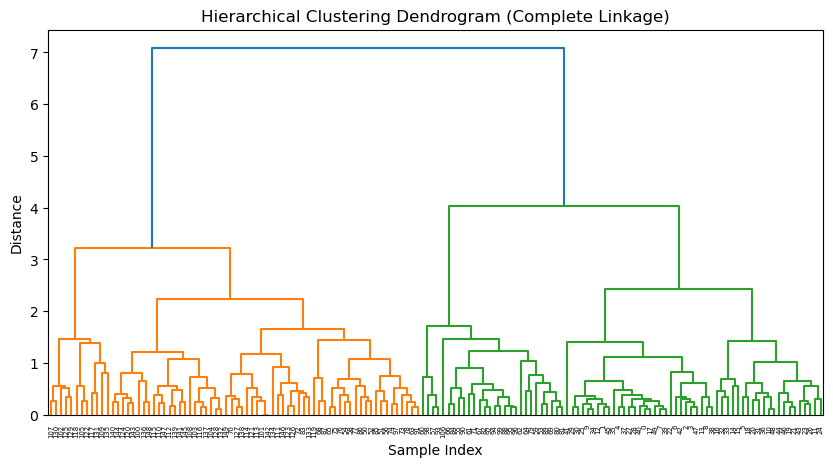

Divisive Clustering Labels: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


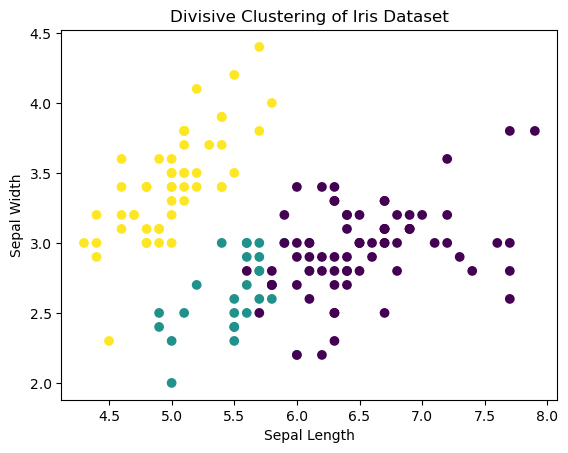

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load the Iris dataset
X = load_iris().data

# Perform hierarchical clustering using complete linkage
Z = linkage(X, method='complete')

# Plot the dendrogram to visualize the clusters
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

# Cut the dendrogram to get divisive clusters
max_clusters = 3  # Specify the maximum number of clusters
labels_divisive = fcluster(Z, max_clusters, criterion='maxclust')

# Print the divisive clustering labels
print("Divisive Clustering Labels:", labels_divisive)

# Plot the divisive clustering results
plt.scatter(X[:, 0], X[:, 1], c=labels_divisive)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Divisive Clustering of Iris Dataset')
plt.show()
